<a href="https://colab.research.google.com/github/Ruphai/UBS/blob/main/Machine_Learning_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading and formating

In this Notebook, we analysed working with geospatial data (Zurich Image) and observed the performance of the lazy algorithm -- KNN on learning the features from the data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install rasterio

     |████████████████████████████████| 19.3 MB 47.2 MB/s 


In [ ]:
%cd /content/drive/My\ Drive/

/content/drive/My Drive


In [ ]:
import rasterio
from rasterio import plot
import numpy as np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


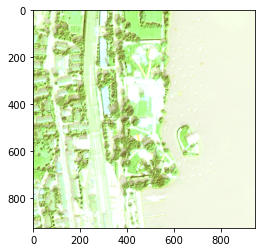

In [ ]:
# read the pixels' values (RGB + IR)
dataset = rasterio.open('UBS/ML4EO/images/zh3.tif')
image = dataset.read([1,2,3,4])
plot.show(image)

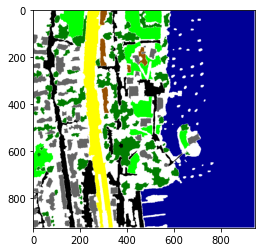

In [ ]:
# read and reformat the labels
dataset = rasterio.open('UBS/ML4EO/images/zh3_GT.tif')
labels = dataset.read([1,2,3])
plot.show(labels)
labels = np.sum(labels, axis=0)
labels[labels==0] = 1
labels[labels==765] = 0
labels[labels==300] = 2
labels[labels==125] = 3
labels[labels==255] = 4
labels[labels==230] = 5
labels[labels==150] = 6
labels[labels==510] = 7
labels[labels==555] = 8

In [ ]:
# put the data into a "good shape"
print("size of the image: ",image.shape, "and of the ground truth: ", labels.shape)
x = image.transpose(2,1,0).reshape(-1,4)
y = np.reshape(labels, (-1,1)).ravel()
print("size of the dataset: ",x.shape, "and of the labels: ", y.shape)

size of the image:  (4, 926, 943) and of the ground truth:  (926, 943)
size of the dataset:  (873218, 4) and of the labels:  (873218,)


In [ ]:
x.shape

(873218, 4)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=2000, test_size= 2000, random_state=1)

In [ ]:
X_train.shape

(2000, 4)

In [ ]:
X_test.shape

(2000, 4)

In [ ]:
y_train.shape

(2000,)

## K Nearest Neighbor: Train sets
*Goal:* Run a simple KNN and evaluate it on training sets

In [ ]:
# Select only 2000 samples for training sets

In [ ]:
ac = []
for i in range(1, 100):
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import accuracy_score

  knn_1 = KNeighborsClassifier(n_neighbors=i)
  knn_1.fit(X_train, y_train)
  y_pred = knn_1.predict(X_train)
  accuracy = accuracy_score(y_train, y_pred)
  ac.append(accuracy)

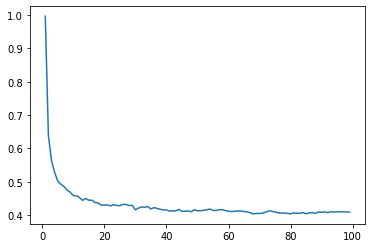

In [ ]:
import seaborn as sns
sns.lineplot(x = range(1, 100), y = ac)

 *Explain the results*
 This out

## K Nearest Neighbor (Test sets)
*Goal:* Run a simple KNN and evaluate it on test sets

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

ac1 = []
for i in range(1, 100):
  knn_2 = KNeighborsClassifier(n_neighbors=i)
  knn_2.fit(X_train, y_train)
  y_pred = knn_2.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  ac1.append(accuracy)

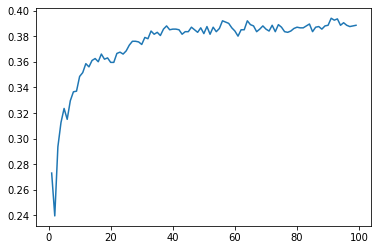

In [ ]:
import seaborn as sns
sns.lineplot(x = range(1, 100), y = ac1)

## Cross Validation

Here, we will carry out a cross-validation on the learning sets to:
- choose the best parameter to pick, 
- have a fair estimation of the generalization error.

Cross-validation is a statistical method used in Machine Learning for estimating the performance of models. It is very important to know how the model will work on unseen data. The situation of overfitting will cause the model to work perfectly on the training data, but the model loses stability when tested on unknown data. For this purpose, we must ensure that the model learns optimal parameters and gets correct patterns from the training data. This is done using cross-validation.


In [ ]:
# Data split: Train, Test, and Validation. 
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(x, y, train_size=2000, test_size= 2000, random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size = 0.5)

In [ ]:
from sklearn.model_selection import cross_val_score
NN = KNeighborsClassifier(n_neighbors=1)
cv_scores = cross_val_score(NN, X_train, y_train, cv=5)
NN.fit(X_train, y_train)
y_pred = NN.predict(X_test)

## Shuffle Split

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=1)
cv_results = cross_validate(
    NN, X_train, y_train, cv=cv, scoring="neg_mean_absolute_error")

In [ ]:
import pandas as pd
cv_results = pd.DataFrame(cv_results)
cv_results.head()

,fit_time,score_time,test_score
0,0.002175,0.046067,-6.991316e+18
1,0.001136,0.036608,-6.769955e+18
2,0.001080,0.048202,-6.013639e+18
3,0.001987,0.044331,-6.880636e+18
4,0.001204,0.089080,-6.290340e+18


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=1)
cv_results = cross_validate(
    NN, X_test, y_test, cv=cv, scoring="neg_mean_absolute_error")

In [ ]:
import pandas as pd
cv_results = pd.DataFrame(cv_results)
cv_results.head()

,fit_time,score_time,test_score
0,0.004386,0.022088,-7.046656e+18
1,0.000956,0.028619,-7.194230e+18
2,0.001138,0.030959,-6.124319e+18
3,0.004136,0.022659,-6.234999e+18
4,0.000861,0.019988,-6.677721e+18


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=1)
cv_results = cross_validate(
    NN, X_valid, y_valid, cv=cv, scoring="neg_mean_absolute_error")

In [ ]:
import pandas as pd
cv_results = pd.DataFrame(cv_results)
cv_results.head()

,fit_time,score_time,test_score
0,0.002614,0.032094,-6.788402e+18
1,0.001035,0.020183,-6.493254e+18
2,0.002486,0.026496,-6.714615e+18
3,0.000813,0.018187,-6.751508e+18
4,0.000846,0.020288,-6.862189e+18


In [ ]:
ac3 = []
for i in range(1, 100):
  NN = KNeighborsClassifier(n_neighbors=i)
  cv_scores = cross_val_score(NN, X_train, y_train, cv=5)
  NN.fit(X_train, y_train)
  y_pred = NN.predict(X_test)
  cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=1)
  cv_results = cross_validate(
      NN, X_test, y_test, cv=cv, scoring="neg_mean_absolute_error")
  ac3.append(cv_results)

In [ ]:
df= pd.DataFrame(ac3)
df.head()

,fit_time,score_time,test_score
0,"[0.0009725093841552734, 0.0012562274932861328,...","[0.020482540130615234, 0.020939111709594727, 0...","[-7.046656236157049e+18, -7.194230188746725e+1..."
1,"[0.001009225845336914, 0.0016129016876220703, ...","[0.023540735244750977, 0.020456790924072266, 0...","[-1.033017668127735e+19, -1.033017668127735e+1..."
2,"[0.0010330677032470703, 0.0009407997131347656,...","[0.02175760269165039, 0.02190423011779785, 0.0...","[-9.186478548707357e+18, -8.965117619822842e+1..."
3,"[0.0009541511535644531, 0.0007956027984619141,...","[0.02660846710205078, 0.019489049911499023, 0....","[-8.190354368727041e+18, -8.190354368727041e+1..."
4,"[0.0010590553283691406, 0.0008578300476074219,...","[0.022044658660888672, 0.020824193954467773, 0...","[-7.784525999105431e+18, -8.005886927989945e+1..."


## Cross Validation
* 5 Fold Cross validation


In [ ]:
from sklearn.model_selection import cross_val_score
KNN = KNeighborsClassifier(n_neighbors=1)#.fit(X_train, y_train)
x1 = cross_val_score(KNN, x, y, cv=5)


In [ ]:
x1[0:2]

array([0.22600261, 0.2201049 ])

In [ ]:
CV = []
for i in range(1, 100):
  NN = KNeighborsClassifier(n_neighbors=i)#.fit(X_train, y_train)
  accuracy = cross_val_score(NN, x, y, cv =5)
  CV.append(accuracy.mean())

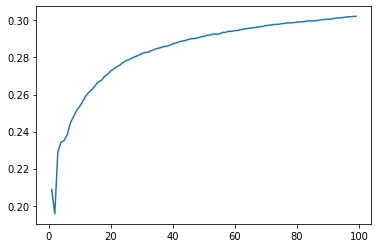

In [ ]:
import seaborn as sns
sns.lineplot(x = range(1, 100), y = CV)

In [ ]:
CV = []
for i in range(1, 100):
  NN = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
  accuracy = cross_val_score(NN, X_test, y_test, cv =5)
  CV.append(accuracy.mean())

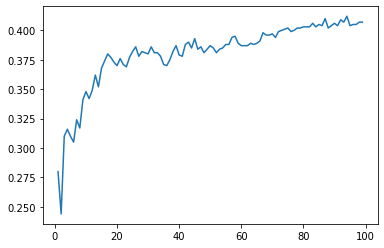

In [ ]:
import seaborn as sns
sns.lineplot(x = range(1, 100), y = CV)

## Estimating Performance Indicators
- Compute confusion matrix on the test sets with the best k parameter
- Compute TPR, FPR, and FNR with y=1 & 0.


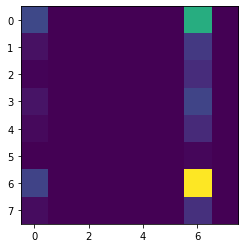

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm)


In [ ]:
TN = cm[0][0], 
FN = cm[1][0], 
TP = cm[1][1],  
FP = cm[0][1]
tpr = TP[0]/(TP[0]+TN[0])
fpr = FP/(FP+TN[0])
fnr = FN[0]/(FN[0]+TP[0])

print("Sensitivity:: TPR: ", tpr)
#print("Specificity:: TNR: ", tnr)
print("False negative rate: ", fnr)
print("False Positive rate: ", fpr)

Sensitivity:: TPR:  0.0
False negative rate:  1.0
False Positive rate:  0.0


In [ ]:
FP

0

In [ ]:
FN[0]

15